In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
sd = pd.read_csv('documents/segdata.csv')
sd

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [6]:
sd.drop('ID',axis=1,inplace=True)
sd.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [7]:
sd.shape

(2000, 7)

In [11]:
sd.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [50]:
sd.Age.describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

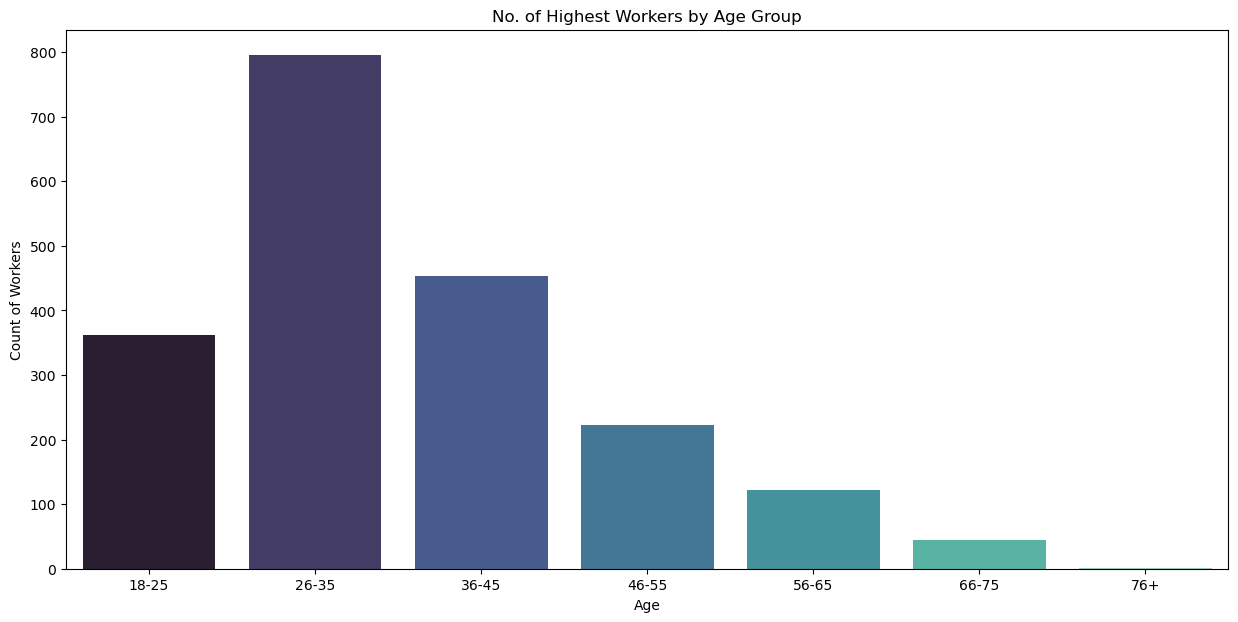

In [72]:
# for better viz and analysis divide age into categories to check which age group of workers
# age has min val = 18 and max = 70
age1 = sd.Age[(sd.Age >= 18) & (sd.Age <= 25)]
age2 = sd.Age[(sd.Age >= 26) & (sd.Age <= 35)]
age3 = sd.Age[(sd.Age >= 36) & (sd.Age <= 45)]
age4 = sd.Age[(sd.Age >= 46) & (sd.Age <= 55)]
age5 = sd.Age[(sd.Age >= 56) & (sd.Age <= 65)]
age6 = sd.Age[(sd.Age >= 66) & (sd.Age <= 75)]
age7 = sd.Age[sd.Age >= 76]

agex = ['18-25','26-35','36-45','46-55','56-65','66-75','76+']
agey = [len(age1.values),len(age2.values),len(age3.values),len(age4.values),len(age5.values),len(age6.values),len(age7.values)]

plt.figure(figsize=(15,7))
sb.barplot(x=agex,y=agey,palette='mako')
plt.title('No. of Highest Workers by Age Group')
plt.xlabel('Age')
plt.ylabel('Count of Workers')
plt.show()

In [61]:
sd.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

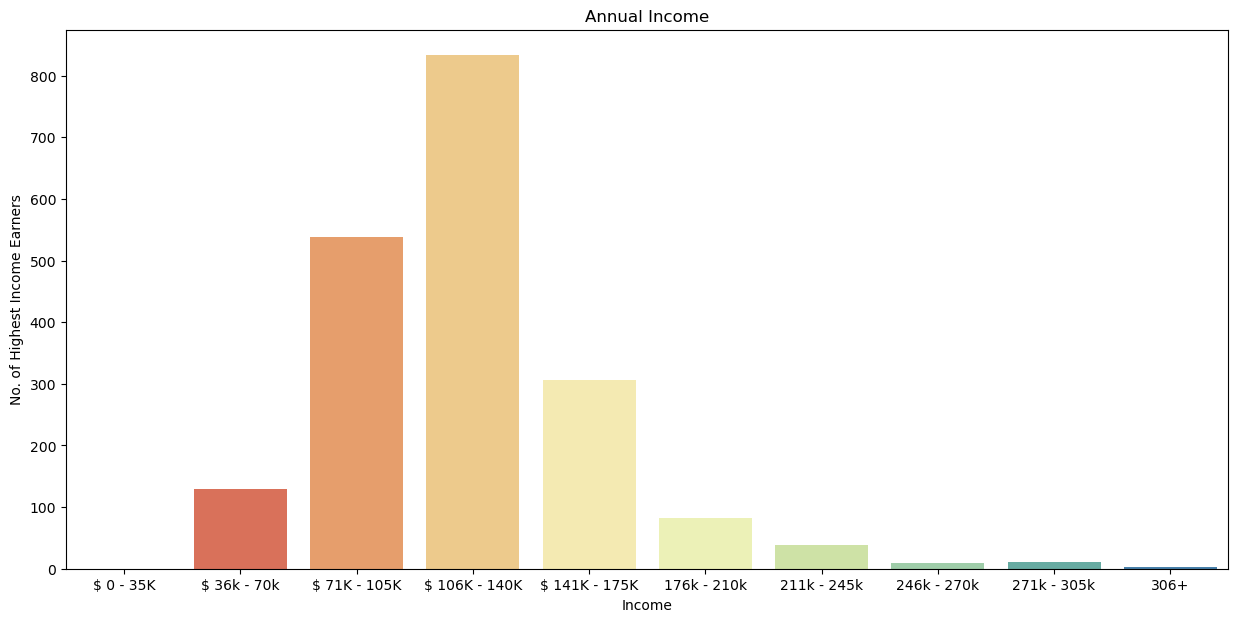

In [62]:
# dividing annual income min = 36 and max = 309
ann1 = sd['Income'][(sd['Income'] >= 0) & (sd['Income'] <= 35000)]
ann2 = sd['Income'][(sd['Income'] >= 36000) & (sd['Income'] <= 70000)]
ann3 = sd['Income'][(sd['Income'] >= 71000) & (sd['Income'] <= 105000)]
ann4 = sd['Income'][(sd['Income'] >= 106000) & (sd['Income'] <= 140000)]
ann5 = sd['Income'][(sd['Income'] >= 141000) & (sd['Income'] <= 175000)]
ann6 = sd['Income'][(sd['Income'] >= 176000) & (sd['Income'] <= 210000)]
ann7 = sd['Income'][(sd['Income'] >= 211000) & (sd['Income'] <= 245000)]
ann8 = sd['Income'][(sd['Income'] >= 246000) & (sd['Income'] <= 270000)]
ann9 = sd['Income'][(sd['Income'] >= 271000) & (sd['Income'] <= 305000)]
ann10 = sd['Income'][(sd['Income'] >= 306000)]

annx = ['$ 0 - 35K','$ 36k - 70k','$ 71K - 105K','$ 106K - 140K','$ 141K - 175K','176k - 210k','211k - 245k','246k - 270k','271k - 305k','306k+']
anny = [len(ann1.values),len(ann2.values),len(ann3.values),len(ann4.values),len(ann5.values),len(ann6.values),len(ann7.values),len(ann8.values),len(ann9.values),len(ann10.values)]

plt.figure(figsize=(15,7))
sb.barplot(x=annx,y=anny,palette='Spectral')
plt.title('Annual Income')
plt.xlabel('Income')
plt.ylabel('No. of Highest Income Earners')
plt.show()

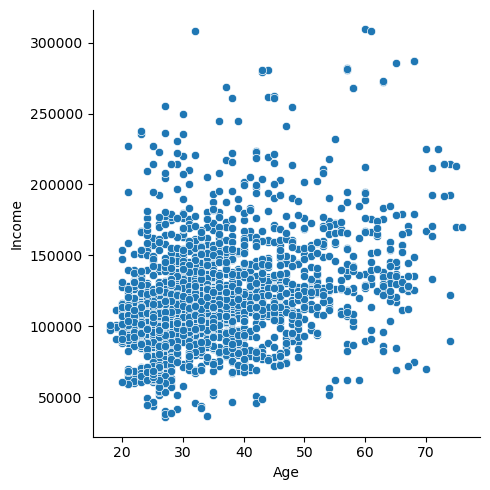

In [55]:
# plotting relitivity b/w age and income
sb.relplot(x='Age',y='Income',data=sd)
plt.show()

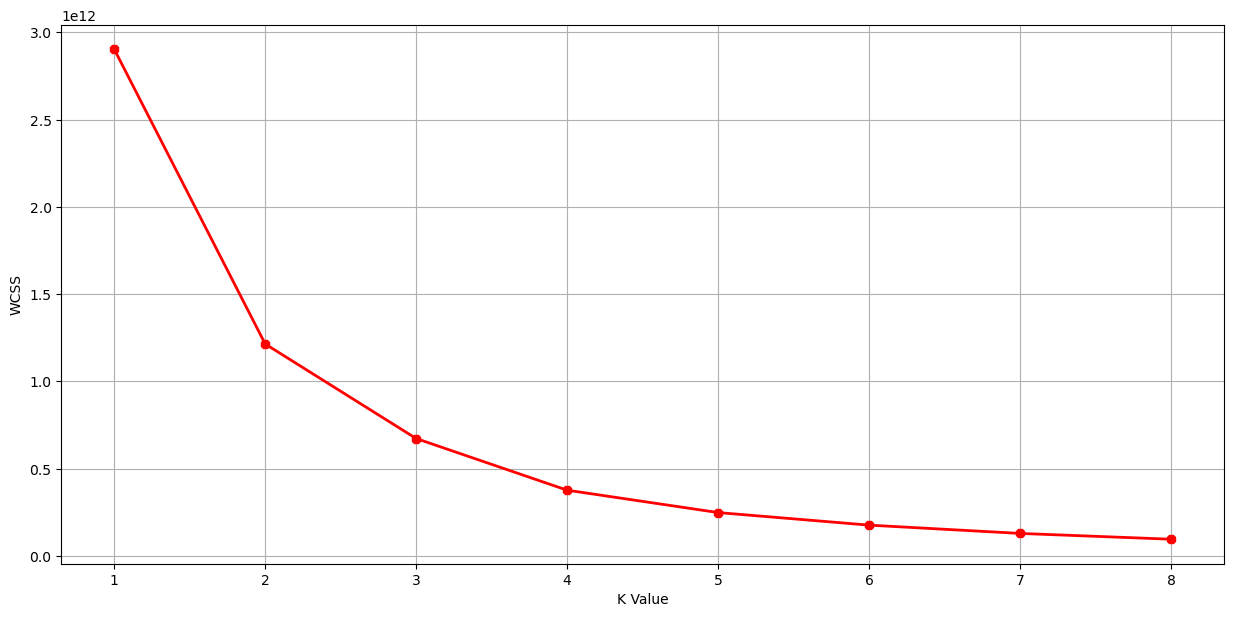

In [64]:
# KMeans to find the elbow clusters to calculate with
x = sd.loc[:,['Age','Income']].values
wcss = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,9),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [65]:
# elbow cluster is equal to 3 implemented into the KMeans
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x)
print(label)

[0 0 1 ... 1 1 1]


In [66]:
# checking centroids
print(kmeans.cluster_centers_)

[[3.79000000e+01 1.32116442e+05]
 [3.19616685e+01 9.07901838e+04]
 [4.39342723e+01 1.99404446e+05]]


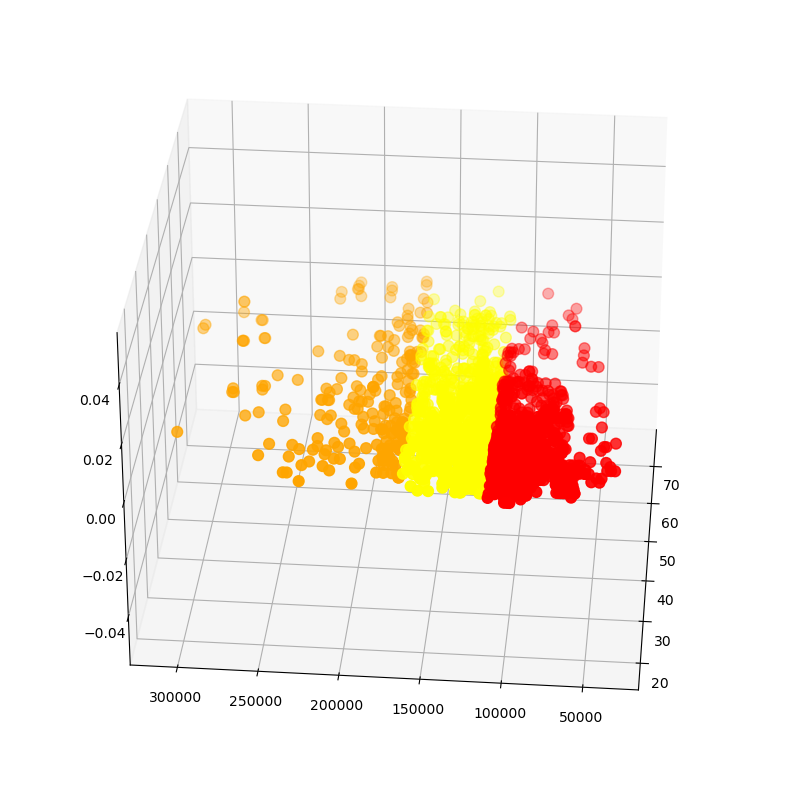

In [71]:
# 3D viz of clusters and centroids
clusters = kmeans.fit_predict(x)
sd['label'] = clusters
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(sd.Age[sd.label==0],sd['Income'][sd.label==0],c='red',s=60)
ax.scatter(sd.Age[sd.label==1],sd['Income'][sd.label==1],c='orange',s=60)
ax.scatter(sd.Age[sd.label==2],sd['Income'][sd.label==2],c='yellow',s=60)

#camera position for 3D plots
ax.view_init(30,185)
plt.show()